# Advanced Transformations (Core)
Name: Michael McCann
Date: 29 APR 2022

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, json

## Load Data

In [2]:
## Load in data from Google and Save to Drive for easy recall.
## Commented out to keep from running on someone elses hard drive... 
# file1 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv"
# file2 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv"

# info = pd.read_csv(file1)
# powers = pd.read_csv(file2)

# FOLDER = "Data/"
# os.makedirs(FOLDER, exist_ok = True)

# info.to_csv(f"{FOLDER}superhero_info.csv.gz", compression = 'gzip', index = False)
# powers.to_csv(f"{FOLDER}superhero_powers.csv.gz", compression = 'gzip', index = False)

In [3]:
# Load Data from saved csv
info = pd.read_csv('data/superhero_info.csv.gz')
powers = pd.read_csv('data/superhero_powers.csv.gz')

## Inspect Data

In [4]:
# Initial inspection
display(info.head())
print('\n\n')
info.info()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [5]:
# Initial inspection
display(powers.head())
print('\n\n')
powers.info()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


## Data Transformation - Hero Info

### String Split

In [6]:
# Split the Hero|Publisher column using string split
info[['Hero', 'Publisher']] = info['Hero|Publisher'].str.split('|', expand = True)
info.drop(columns = 'Hero|Publisher', inplace = True)
info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics
...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}",Yellowjacket,Marvel Comics
459,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}",Yellowjacket II,Marvel Comics
460,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}",Yoda,George Lucas
461,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}",Zatanna,DC Comics


In [7]:
# Check other columns for wonky data
columns = list(info.columns)
for col in columns:
    print(f"-{col}")
    print(info[col].value_counts())
    print('\n')

-Gender
Male       321
Female     134
Unknown      8
Name: Gender, dtype: int64


-Race
Human                156
Unknown              145
Mutant                51
Human / Radiation     11
Android                7
Symbiote               7
Alien                  6
Demon                  6
Cyborg                 6
Kryptonian             5
Atlantean              5
Asgardian              5
Inhuman                4
New God                3
Human-Kree             2
Eternal                2
Demi-God               2
Saiyan                 2
Amazon                 2
Human / Altered        2
Metahuman              2
God / Eternal          2
Human-Vulcan           1
Martian                1
Zombie                 1
Korugaran              1
Talokite               1
Clone                  1
Human-Spartoi          1
Animal                 1
Yautja                 1
Human / Cosmic         1
Tamaranean             1
Mutant / Clone         1
Luphomoid              1
Frost Giant            1
Strontian   

### Convert Dict and Split

In [8]:
# change quotes and drop the cm/kg
info['Measurements'] = info['Measurements'].str.replace("'", '"')
info['Measurements'] = info['Measurements'].str.replace(" cm", '')
info['Measurements'] = info['Measurements'].str.replace(" kg", '')

# apply json.load to turn back into a dictionary
info['Measurements'] = info['Measurements'].apply(json.loads)
info['Measurements']

0      {'Height': '203.0', 'Weight': '441.0'}
1       {'Height': '191.0', 'Weight': '65.0'}
2       {'Height': '185.0', 'Weight': '90.0'}
3      {'Height': '203.0', 'Weight': '441.0'}
4      {'Height': '193.0', 'Weight': '122.0'}
                        ...                  
458     {'Height': '183.0', 'Weight': '83.0'}
459     {'Height': '165.0', 'Weight': '52.0'}
460      {'Height': '66.0', 'Weight': '17.0'}
461     {'Height': '170.0', 'Weight': '57.0'}
462     {'Height': '185.0', 'Weight': '81.0'}
Name: Measurements, Length: 463, dtype: object

In [9]:
# use pd.series to split dictionary into new DF.
height_weight = info['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0
...,...,...
458,183.0,83.0
459,165.0,52.0
460,66.0,17.0
461,170.0,57.0


In [10]:
# concat back into original df and drop dict column
info = pd.concat((info, height_weight), axis = 1)
info.drop(columns = 'Measurements', inplace = True)
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [11]:
# change height and weight into numeric
info['Height'] = info['Height'].astype(float)
info['Weight'] = info['Weight'].astype(float)

In [12]:
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


### Reorder Columns

In [13]:
# get column order
cols = ['Hero', 'Publisher', 'Gender', 'Eye color',
        'Race', 'Height', 'Hair color', 'Skin color', 'Alignment', 'Weight']

# apply column order
info = info[cols]
info.head()

,Hero,Publisher,Gender,Eye color,Race,Height,Hair color,Skin color,Alignment,Weight
0,A-Bomb,Marvel Comics,Male,yellow,Human,203.0,No Hair,Unknown,good,441.0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,191.0,No Hair,blue,good,65.0
2,Abin Sur,DC Comics,Male,blue,Ungaran,185.0,No Hair,red,good,90.0
3,Abomination,Marvel Comics,Male,green,Human / Radiation,203.0,No Hair,Unknown,bad,441.0
4,Absorbing Man,Marvel Comics,Male,blue,Human,193.0,No Hair,Unknown,bad,122.0


## Data Transformation - Powers

In [14]:
powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


### Convert list to OHE

In [15]:
# Split powers into a useable list
powers['powers_split'] = powers['Powers'].str.split(',')

In [16]:
powers['Powers'].head()

0           Agility,Super Strength,Stamina,Super Speed
1    Accelerated Healing,Durability,Longevity,Super...
2    Agility,Accelerated Healing,Cold Resistance,Du...
3                                   Lantern Power Ring
4    Accelerated Healing,Intelligence,Super Strengt...
Name: Powers, dtype: object

In [17]:
# Use explode to expand powers list across column
exploded = powers.explode('powers_split')
exploded.head()

,hero_names,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [18]:
# get unique values of exploded column for transformation/OHE
cols_to_make = exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [19]:
# Apply for loop to create OHE
for col in cols_to_make:
    powers[col] = powers['Powers'].str.contains(col)
    
powers.head()

G:\Program Files (x86)\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Change True/False into 1/0
powers.iloc[:,3:] = powers.iloc[:,3:].astype(int)

In [21]:
# drop duplicate/old columns
powers.drop(columns = ['Powers', 'powers_split'], inplace = True)
powers.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merge DataFrames

In [22]:
# use pd.merge to combine info and powers.
super = pd.merge(info, powers, 
                 left_on = 'Hero', right_on = 'hero_names', how = 'inner')

In [23]:
super.head()

,Hero,Publisher,Gender,Eye color,Race,Height,Hair color,Skin color,Alignment,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,yellow,Human,203.0,No Hair,Unknown,good,441.0,...,0,0,0,0,0,0,0,0,0,0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,191.0,No Hair,blue,good,65.0,...,0,0,0,0,0,0,0,0,0,0
2,Abin Sur,DC Comics,Male,blue,Ungaran,185.0,No Hair,red,good,90.0,...,0,0,0,0,0,0,0,0,0,0
3,Abomination,Marvel Comics,Male,green,Human / Radiation,203.0,No Hair,Unknown,bad,441.0,...,0,0,0,0,0,0,0,0,0,0
4,Absorbing Man,Marvel Comics,Male,blue,Human,193.0,No Hair,Unknown,bad,122.0,...,0,0,0,0,0,0,0,0,0,0


# Data Exploration
1. Compare the average weight of super powers who have Super Speed to those who do not.
2. What is the average height of heroes for each publisher?

In [24]:
speed = super.groupby('Super Speed')['Weight'].mean()
display(speed)
print(f"\nThe average weight of superheroes with super speed is {speed[1]:.2f} kg")
print(f"Whereas the average weight of superheroes without super speed is {speed[0]:.2f} kg")

Super Speed
0    101.773585
1    129.404040
Name: Weight, dtype: float64


The average weight of superheroes with super speed is 129.40 kg
Whereas the average weight of superheroes without super speed is 101.77 kg


In [25]:
shorttall = super.groupby('Publisher')['Height'].mean().sort_values()
shorttall

Publisher
George Lucas         159.600000
Shueisha             171.500000
Dark Horse Comics    176.909091
Unknown              178.000000
Team Epic TV         180.750000
Star Trek            181.500000
DC Comics            181.923913
Marvel Comics        191.546128
Image Comics         211.000000
Name: Height, dtype: float64

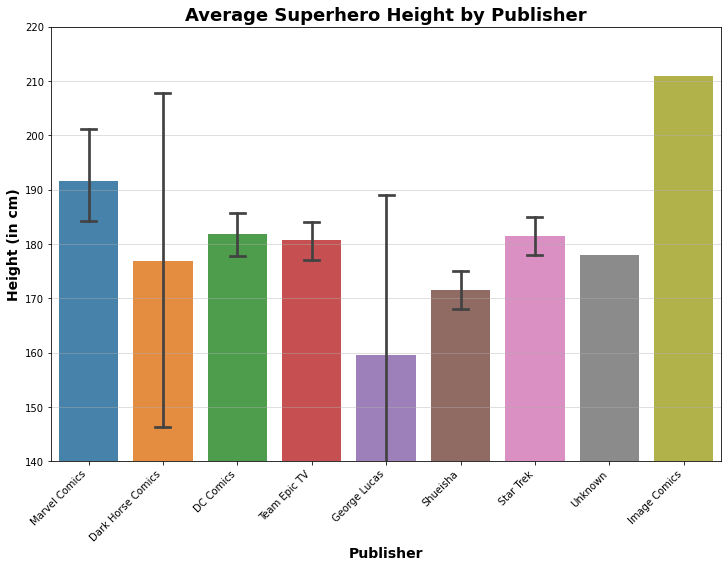

In [26]:
plt.figure(figsize = (12, 8))
sns.barplot(x = super['Publisher'], y = super['Height'], alpha = .9, capsize = .2)
plt.ylim(140,220)
plt.grid(axis = 'y', alpha = .5)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Average Superhero Height by Publisher', fontsize = 18, weight = 'bold')
plt.xlabel('Publisher', fontsize=14, weight = 'semibold')
plt.ylabel('Height (in cm)',  fontsize=14, weight = 'semibold');